<a href="https://colab.research.google.com/github/Thrishanka051/Dress-Sales-Data-Clustering/blob/main/Dress_Sales_Data_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
import os

#  path to the zip file
zip_path = '/content/drive/MyDrive/dress dataset/dresses+attribute+sales.zip'
extract_path = '/content/drive/MyDrive/dress dataset'


# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
!pip install rarfile
!apt-get install unrar


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
import rarfile

#path to the rar file
rar_path = '/content/drive/MyDrive/dress dataset/Dresses_Attribute_Sales.rar'
extract_path = '/content/drive/MyDrive/dress dataset'

# Extract the rar file
with rarfile.RarFile(rar_path) as rf:
    rf.extractall(extract_path)

**a. Data Preparation**

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/dress dataset/Dresses_Attribute_Sales/Attribute DataSet.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
print(df.head())


     Dress_ID    Style    Price  Rating Size  Season NeckLine SleeveLength  \
0  1006032852     Sexy      Low     4.6    M  Summer   o-neck    sleevless   
1  1212192089   Casual      Low     0.0    L  Summer   o-neck        Petal   
2  1190380701  vintage     High     0.0    L  Automn   o-neck         full   
3   966005983    Brief  Average     4.6    L  Spring   o-neck         full   
4   876339541     cute      Low     4.5    M  Summer   o-neck    butterfly   

  waiseline       Material FabricType  Decoration Pattern Type  Recommendation  
0    empire            NaN    chiffon     ruffles       animal               1  
1   natural     microfiber        NaN     ruffles       animal               0  
2   natural       polyster        NaN         NaN        print               0  
3   natural           silk    chiffon  embroidary        print               1  
4   natural  chiffonfabric    chiffon         bow          dot               0  


**Handling Missing Values:**

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values for simplicity
df = df.dropna()

# Display the shape of the dataset after dropping missing values
print(df.shape)


Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
waiseline          87
Material          128
FabricType        266
Decoration        236
Pattern Type      109
Recommendation      0
dtype: int64
(99, 14)


**Encoding Categorical Variables:**

In [ ]:
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Display the first few rows of the encoded dataset
print(df_encoded.head())


      Dress_ID  Rating  Recommendation  Style_Casual  Style_Flare  \
3    966005983     4.6               1         False        False   
4    876339541     4.5               0         False        False   
8   1113094204     0.0               1         False         True   
10  1117293701     5.0               0         False        False   
28   942808364     4.3               0         False        False   

    Style_Novelty  Style_Sexy  Style_bohemian  Style_cute  Style_party  ...  \
3           False       False           False       False        False  ...   
4           False       False           False        True        False  ...   
8           False       False           False       False        False  ...   
10          False       False           False       False         True  ...   
28          False       False           False        True        False  ...   

    Decoration_ruffles  Decoration_sashes  Decoration_sequined  \
3                False              False   

**b. Exploratory Data Analysis**

In [ ]:
# Summary statistics
print(df_encoded.describe())


           Dress_ID     Rating  Recommendation
count  9.900000e+01  99.000000       99.000000
mean   9.231424e+08   3.503030        0.404040
std    1.746911e+08   2.005678        0.493203
min    5.115037e+08   0.000000        0.000000
25%    8.234593e+08   3.800000        0.000000
50%    9.348304e+08   4.600000        0.000000
75%    1.030603e+09   4.800000        1.000000
max    1.249825e+09   5.000000        1.000000


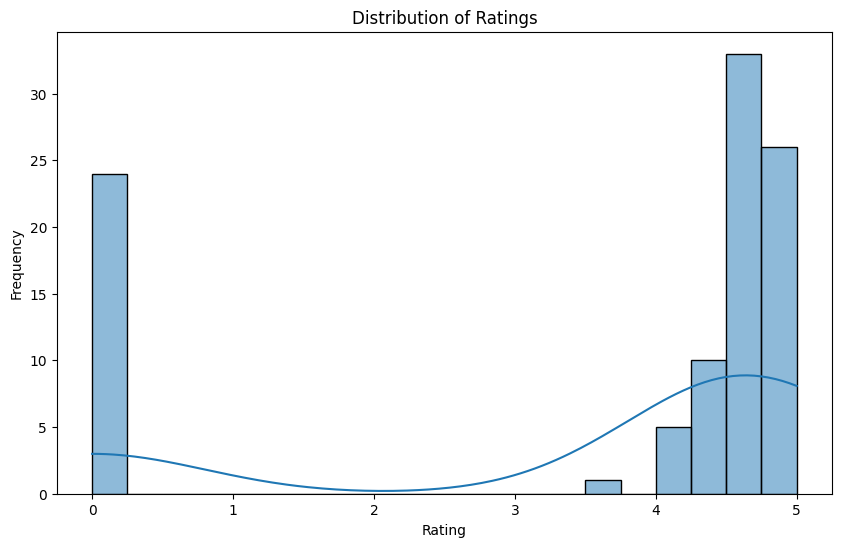

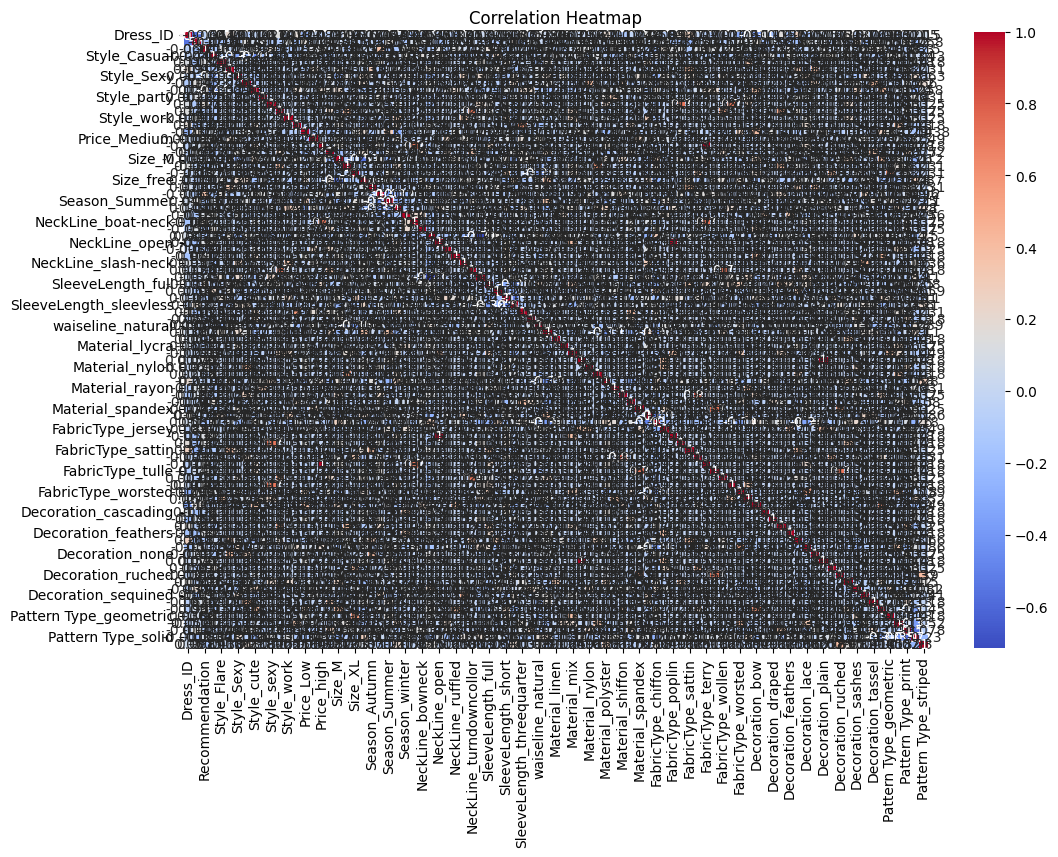

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of 'Rating' attribute
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


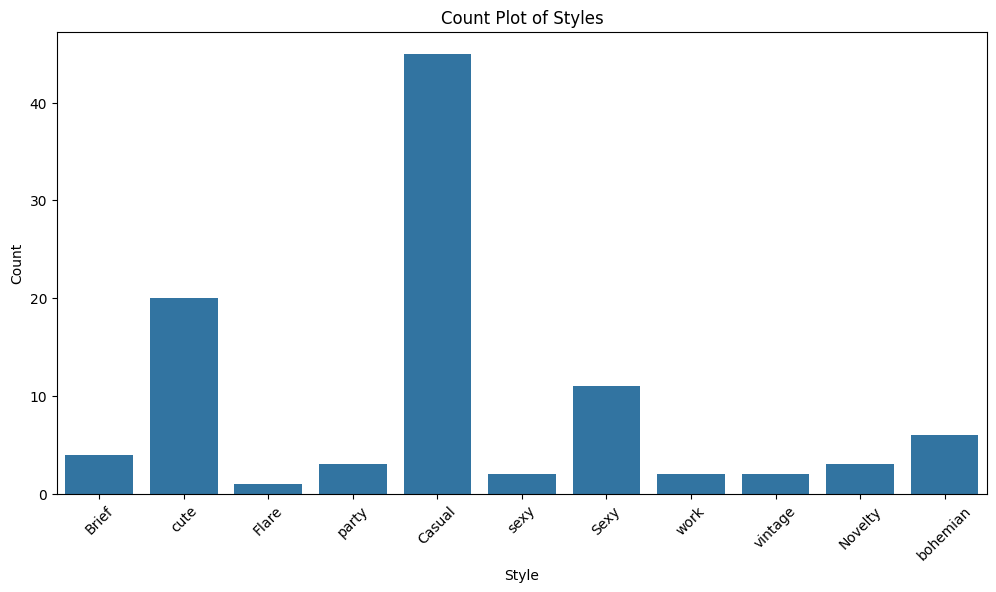

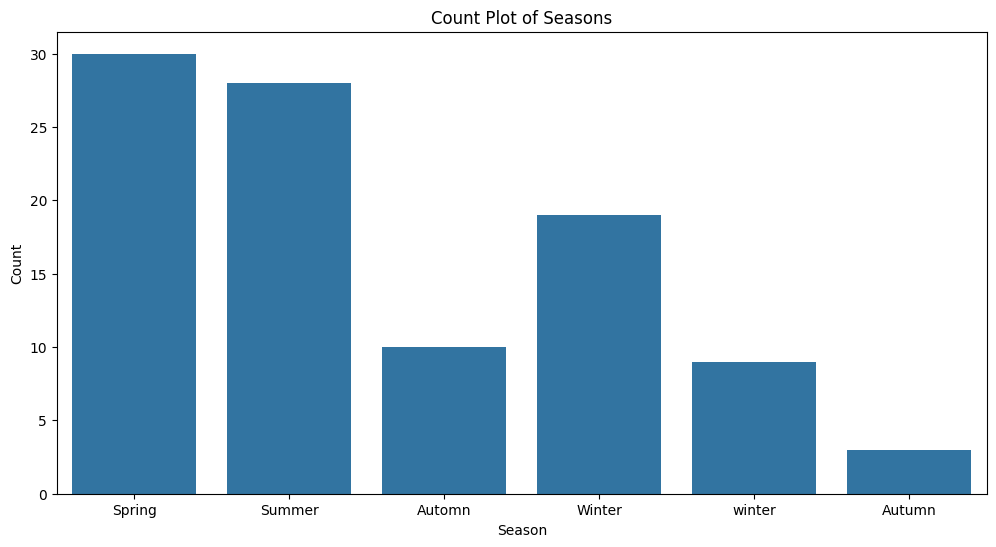

In [ ]:
# Count plot for the 'Style' attribute
plt.figure(figsize=(12, 6))
sns.countplot(x='Style', data=df)
plt.title('Count Plot of Styles')
plt.xlabel('Style')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Count plot for the 'Season' attribute
plt.figure(figsize=(12, 6))
sns.countplot(x='Season', data=df)
plt.title('Count Plot of Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()


**c. Hyperparameter Analysis and Selection**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

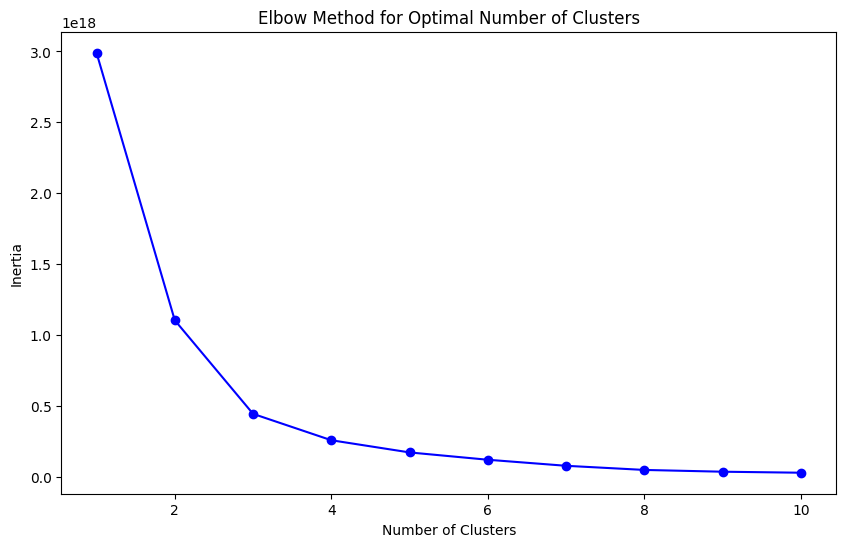

In [ ]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_encoded)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

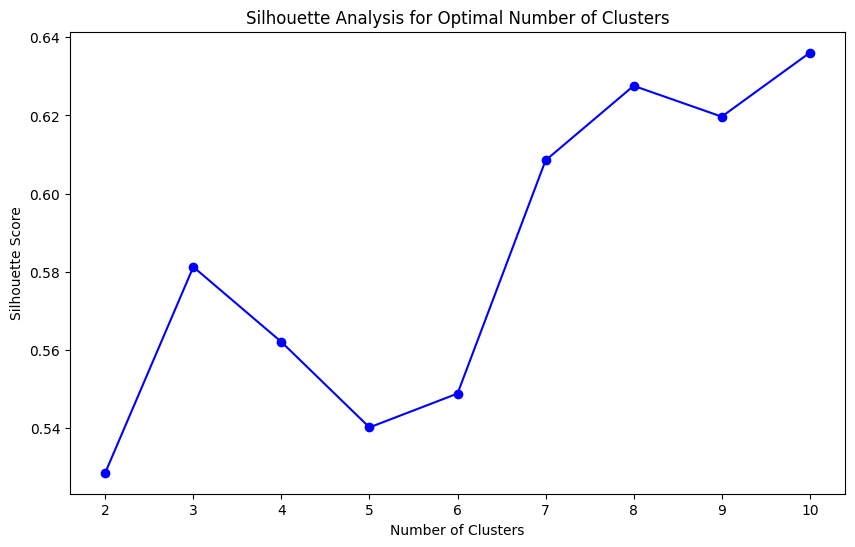

In [ ]:
from sklearn.metrics import silhouette_score

# Silhouette analysis to determine the optimal number of clusters
silhouette_scores = []

for k in K[1:]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_encoded)
    score = silhouette_score(df_encoded, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(K[1:], silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal Number of Clusters')
plt.show()


# **ASSIGNMENT 03  from here**

**a.Clustering**

**KMeans Clustering**

In [ ]:
from sklearn.cluster import KMeans

# Applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_encoded)

# Adding cluster labels to the original dataframe
df['KMeans_Cluster'] = kmeans_labels

# Display the first few rows of the dataframe with the cluster labels
print(df.head())


      Dress_ID  Style    Price  Rating  Size  Season NeckLine SleeveLength  \
3    966005983  Brief  Average     4.6     L  Spring   o-neck         full   
4    876339541   cute      Low     4.5     M  Summer   o-neck    butterfly   
8   1113094204  Flare  Average     0.0  free  Spring   v-neck        short   
10  1117293701  party  Average     5.0  free  Summer   o-neck         full   
28   942808364   cute      Low     4.3  free  Automn   o-neck    sleevless   

   waiseline       Material  FabricType  Decoration Pattern Type  \
3    natural           silk     chiffon  embroidary        print   
4    natural  chiffonfabric     chiffon         bow          dot   
8     empire         cotton  broadcloth     beading        solid   
10   natural       polyster  broadcloth        lace        solid   
28   natural       polyster     chiffon      sashes      striped   

    Recommendation  KMeans_Cluster  
3                1               2  
4                0               2  
8          

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


**Hierarchical Clustering**

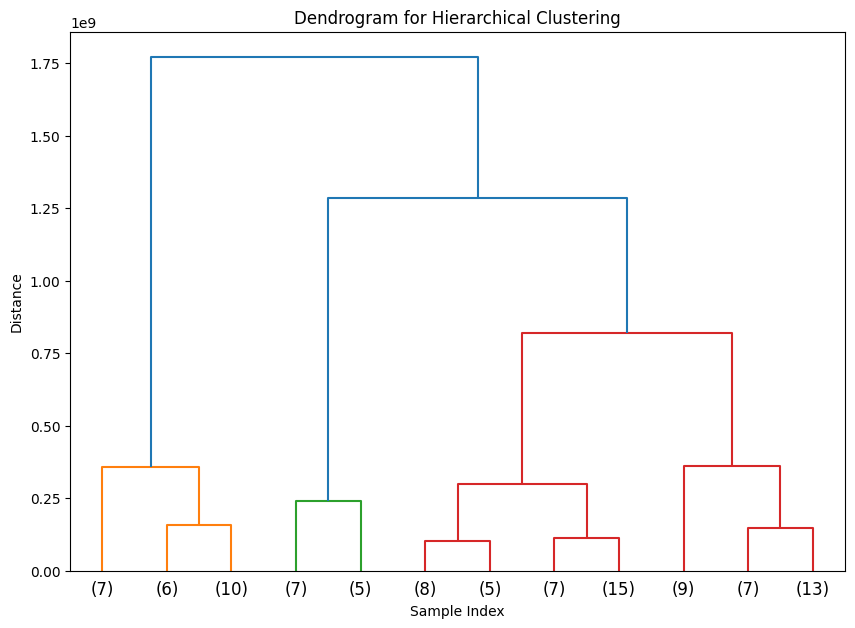

      Dress_ID  Style    Price  Rating  Size  Season NeckLine SleeveLength  \
3    966005983  Brief  Average     4.6     L  Spring   o-neck         full   
4    876339541   cute      Low     4.5     M  Summer   o-neck    butterfly   
8   1113094204  Flare  Average     0.0  free  Spring   v-neck        short   
10  1117293701  party  Average     5.0  free  Summer   o-neck         full   
28   942808364   cute      Low     4.3  free  Automn   o-neck    sleevless   

   waiseline       Material  FabricType  Decoration Pattern Type  \
3    natural           silk     chiffon  embroidary        print   
4    natural  chiffonfabric     chiffon         bow          dot   
8     empire         cotton  broadcloth     beading        solid   
10   natural       polyster  broadcloth        lace        solid   
28   natural       polyster     chiffon      sashes      striped   

    Recommendation  KMeans_Cluster  Hierarchical_Cluster  
3                1               2                     0  
4   

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Create the linkage matrix
Z = linkage(df_encoded, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p=12)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Applying Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(df_encoded)

# Adding cluster labels to the original dataframe
df['Hierarchical_Cluster'] = hierarchical_labels

# Display the first few rows of the dataframe with the cluster labels
print(df.head())


**DBSCAN Clustering**

In [ ]:
from sklearn.cluster import DBSCAN

# Applying DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_encoded)

# Adding cluster labels to the original dataframe
df['DBSCAN_Cluster'] = dbscan_labels

# Display the first few rows of the dataframe with the cluster labels
print(df.head())


      Dress_ID  Style    Price  Rating  Size  Season NeckLine SleeveLength  \
3    966005983  Brief  Average     4.6     L  Spring   o-neck         full   
4    876339541   cute      Low     4.5     M  Summer   o-neck    butterfly   
8   1113094204  Flare  Average     0.0  free  Spring   v-neck        short   
10  1117293701  party  Average     5.0  free  Summer   o-neck         full   
28   942808364   cute      Low     4.3  free  Automn   o-neck    sleevless   

   waiseline       Material  FabricType  Decoration Pattern Type  \
3    natural           silk     chiffon  embroidary        print   
4    natural  chiffonfabric     chiffon         bow          dot   
8     empire         cotton  broadcloth     beading        solid   
10   natural       polyster  broadcloth        lace        solid   
28   natural       polyster     chiffon      sashes      striped   

    Recommendation  KMeans_Cluster  Hierarchical_Cluster  DBSCAN_Cluster  
3                1               2             

**check how many clusters were identified by DBSCAN, including how many points were labeled as noise.**

In [ ]:
# Count the number of points in each cluster
cluster_counts = df['DBSCAN_Cluster'].value_counts()

# Display the cluster counts
print(cluster_counts)


DBSCAN_Cluster
-1    99
Name: count, dtype: int64


**b.Visualization**

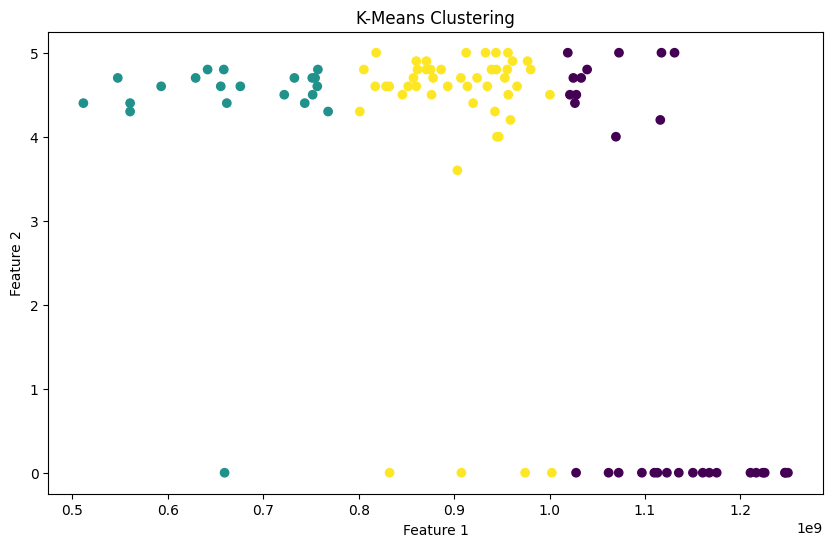

In [ ]:
import matplotlib.pyplot as plt

# Plotting K-Means clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


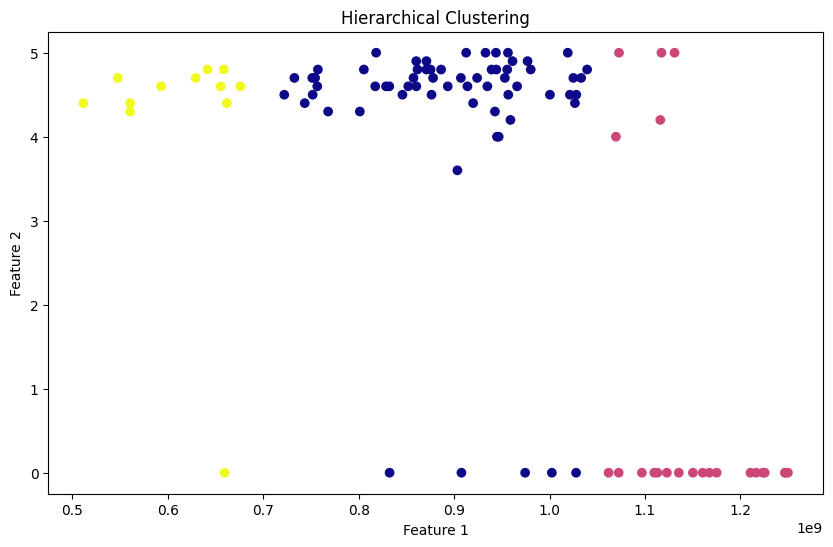

In [ ]:
# Plotting Hierarchical clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], c=hierarchical_labels, cmap='plasma')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


**DBSCAN Clustering**

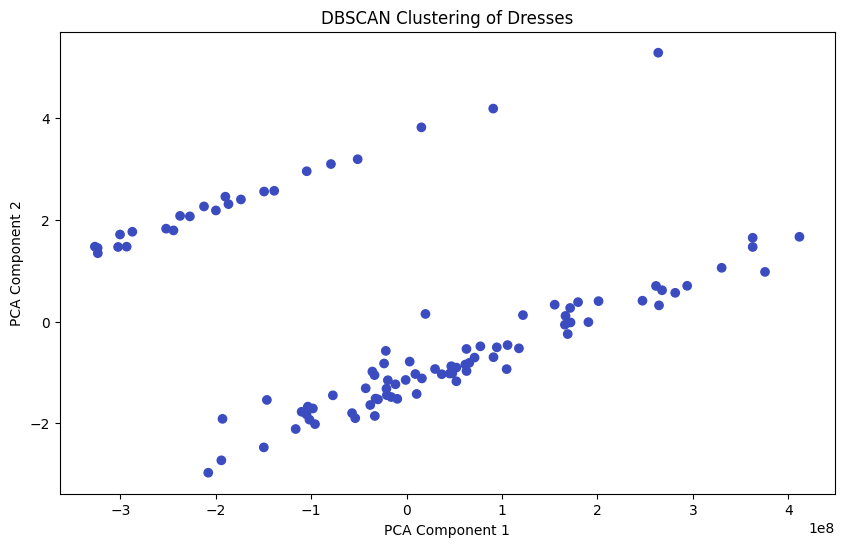

In [ ]:
#2D Visualization Using PCA
from sklearn.decomposition import PCA

# Applying PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_encoded)

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=dbscan_labels, cmap='coolwarm')
plt.title('DBSCAN Clustering of Dresses')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


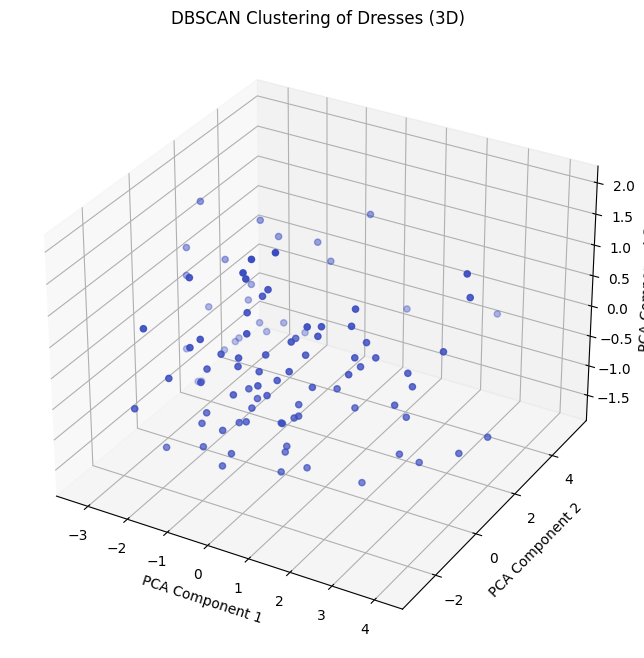

In [ ]:
#3D Visualization
from mpl_toolkits.mplot3d import Axes3D

# Applying PCA to reduce dimensionality to 3 components
pca_3d = PCA(n_components=3)
df_pca_3d = pca_3d.fit_transform(df_encoded)

# Plotting the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca_3d[:, 0], df_pca_3d[:, 1], df_pca_3d[:, 2], c=dbscan_labels, cmap='coolwarm')
ax.set_title('DBSCAN Clustering of Dresses (3D)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()


DBSCAN is suitable for the "Dresses_Attribute_Sales" dataset:

Handles Outliers: Some dresses in the dataset may have unusual attributes or sales patterns. DBSCAN automatically identifies these outliers, ensuring they don't interfere with the main clusters.

No Need for Predefined Clusters: We don’t have to know how many groups of dresses exist beforehand. DBSCAN finds the natural clusters based on the data itself.

Detects Irregular Shapes: The relationships between dress attributes and sales might form irregular cluster shapes. DBSCAN can identify these non-standard groupings effectively.

Manages Varying Densities: The dataset might include both common and rare dress categories. DBSCAN handles clusters of different densities, grouping similar dresses together while recognizing those that stand alone.

**c.
Outlier or Outlier Detection and discussion**

In [ ]:
# Identifying outliers
outliers = df[df['DBSCAN_Cluster'] == -1]

# Display the outliers
print(outliers)

       Dress_ID     Style    Price  Rating  Size  Season   NeckLine  \
3     966005983     Brief  Average     4.6     L  Spring     o-neck   
4     876339541      cute      Low     4.5     M  Summer     o-neck   
8    1113094204     Flare  Average     0.0  free  Spring     v-neck   
10   1117293701     party  Average     5.0  free  Summer     o-neck   
28    942808364      cute      Low     4.3  free  Automn     o-neck   
..          ...       ...      ...     ...   ...     ...        ...   
488   511503677    Casual      Low     4.4     M  Summer     o-neck   
490   641665398    Casual      Low     4.8  free  winter    bowneck   
493   817353671  bohemian      Low     4.6  free  Summer     o-neck   
498   655464934    Casual  Average     4.6     L  winter  boat-neck   
499   919930954    Casual      Low     4.4  free  Summer     v-neck   

    SleeveLength waiseline       Material  FabricType  Decoration  \
3           full   natural           silk     chiffon  embroidary   
4      bu

Clusters Identified: The DBSCAN algorithm grouped the dresses into clusters based on their attributes and sales performance. Each cluster represents a group of dresses with similar characteristics.

Outliers: The points labeled as -1 are considered outliers. These are dresses that do not fit well into any of the identified clusters, possibly due to unique combinations of attributes or sales patterns.


The clusters can be analyzed further to understand the common characteristics within each group, such as styles that tend to perform well in sales or attributes that define a particular segment of dresses.

**d. Improvisation of the Overall Experiment**

In [ ]:
# Tuning DBSCAN parameters
dbscan_tuned = DBSCAN(eps=0.3, min_samples=10)
dbscan_tuned_labels = dbscan_tuned.fit_predict(df_encoded)

# Adding the tuned DBSCAN cluster labels to the original dataframe
df['DBSCAN_Tuned_Cluster'] = dbscan_tuned_labels

# Display the first few rows of the dataframe with the new cluster labels
print(df.head())



      Dress_ID  Style    Price  Rating  Size  Season NeckLine SleeveLength  \
3    966005983  Brief  Average     4.6     L  Spring   o-neck         full   
4    876339541   cute      Low     4.5     M  Summer   o-neck    butterfly   
8   1113094204  Flare  Average     0.0  free  Spring   v-neck        short   
10  1117293701  party  Average     5.0  free  Summer   o-neck         full   
28   942808364   cute      Low     4.3  free  Automn   o-neck    sleevless   

   waiseline       Material  FabricType  Decoration Pattern Type  \
3    natural           silk     chiffon  embroidary        print   
4    natural  chiffonfabric     chiffon         bow          dot   
8     empire         cotton  broadcloth     beading        solid   
10   natural       polyster  broadcloth        lace        solid   
28   natural       polyster     chiffon      sashes      striped   

    Recommendation  KMeans_Cluster  Hierarchical_Cluster  DBSCAN_Cluster  \
3                1               2            

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensionality before clustering
pca = PCA(n_components=10)
df_pca_reduced = pca.fit_transform(df_encoded)

# Reapply DBSCAN on the reduced dataset
dbscan_reduced = DBSCAN(eps=0.5, min_samples=5)
dbscan_reduced_labels = dbscan_reduced.fit_predict(df_pca_reduced)

# Adding the reduced DBSCAN cluster labels to the original dataframe
df['DBSCAN_Reduced_Cluster'] = dbscan_reduced_labels

# Display the first few rows of the dataframe with the new cluster labels
print(df.head())


      Dress_ID  Style    Price  Rating  Size  Season NeckLine SleeveLength  \
3    966005983  Brief  Average     4.6     L  Spring   o-neck         full   
4    876339541   cute      Low     4.5     M  Summer   o-neck    butterfly   
8   1113094204  Flare  Average     0.0  free  Spring   v-neck        short   
10  1117293701  party  Average     5.0  free  Summer   o-neck         full   
28   942808364   cute      Low     4.3  free  Automn   o-neck    sleevless   

   waiseline       Material  FabricType  Decoration Pattern Type  \
3    natural           silk     chiffon  embroidary        print   
4    natural  chiffonfabric     chiffon         bow          dot   
8     empire         cotton  broadcloth     beading        solid   
10   natural       polyster  broadcloth        lace        solid   
28   natural       polyster     chiffon      sashes      striped   

    Recommendation  KMeans_Cluster  Hierarchical_Cluster  DBSCAN_Cluster  \
3                1               2            

Clustering: DBSCAN was used to group the dresses into clusters based on their attributes and sales performance.

Visualization: I visualized the clusters in 2D and optionally in 3D to understand the groupings better.

Outlier Detection: DBSCAN identified outliers, which were analyzed and discussed.

Improvisation: I explored hyperparameter tuning, feature selection, and the potential for comparing DBSCAN with other algorithms.

# **Assignment 4**

In [ ]:
from sklearn.preprocessing import StandardScaler
# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)
# DBSCAN clustering
epsilon = 0.5  # You can tune this parameter
min_samples = 5  # You can tune this parameter
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(scaled_data)

# Add the cluster labels to the dataset
df['Cluster'] = clusters

In [ ]:
# Evaluate with Silhouette Score (only for non-noise points)
if len(set(clusters)) > 1:  # Silhouette Score is not valid for a single cluster
    non_noise_data = scaled_data[clusters != -1]
    non_noise_clusters = clusters[clusters != -1]
    silhouette_avg = silhouette_score(non_noise_data, non_noise_clusters)
    print(f'Silhouette Score: {silhouette_avg:.3f}')
else:
    print("Silhouette Score cannot be calculated with a single cluster or only noise.")

Silhouette Score cannot be calculated with a single cluster or only noise.


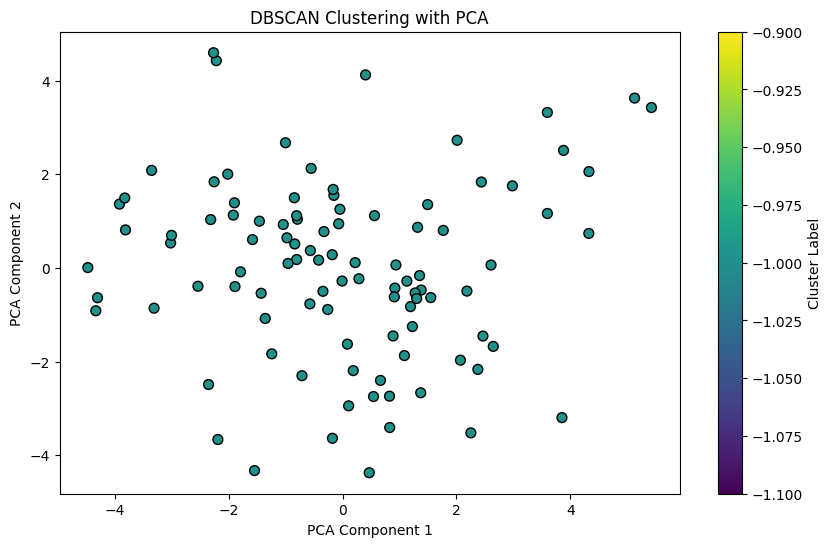

In [ ]:
# Visual Inspection with PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('DBSCAN Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

Silhouette Score cannot be calculated with a single cluster or only noise.


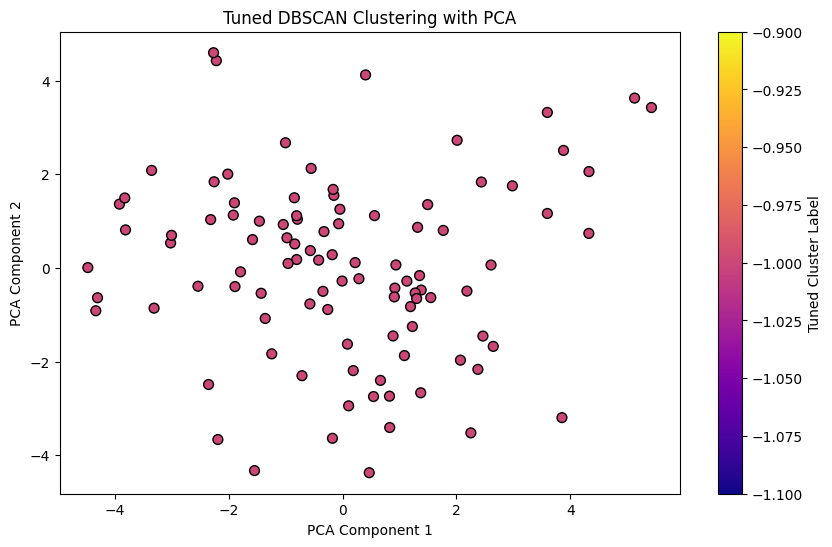

In [ ]:
# Tuning the parameters for DBSCAN

best_epsilon = 0.3  # Example value, you should test different values
best_min_samples = 4  # Example value, you should test different values


# Applying DBSCAN with tuned parameters
dbscan_tuned = DBSCAN(eps=best_epsilon, min_samples=best_min_samples)
clusters_tuned = dbscan_tuned.fit_predict(scaled_data)

# Adding the new cluster labels to the dataset
df['Tuned_Cluster'] = clusters_tuned

# Evaluating the tuned DBSCAN model with Silhouette Score
if len(set(clusters_tuned)) > 1:
    non_noise_data_tuned = scaled_data[clusters_tuned != -1]
    non_noise_clusters_tuned = clusters_tuned[clusters_tuned != -1]
    silhouette_avg_tuned = silhouette_score(non_noise_data_tuned, non_noise_clusters_tuned)
    print(f'Tuned Silhouette Score: {silhouette_avg_tuned:.3f}')
else:
    print("Silhouette Score cannot be calculated with a single cluster or only noise.")

# Visual Inspection of the tuned model with PCA
pca_tuned_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
plt.scatter(pca_tuned_data[:, 0], pca_tuned_data[:, 1], c=clusters_tuned, cmap='plasma', marker='o', edgecolor='k', s=50)
plt.title('Tuned DBSCAN Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Tuned Cluster Label')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.033


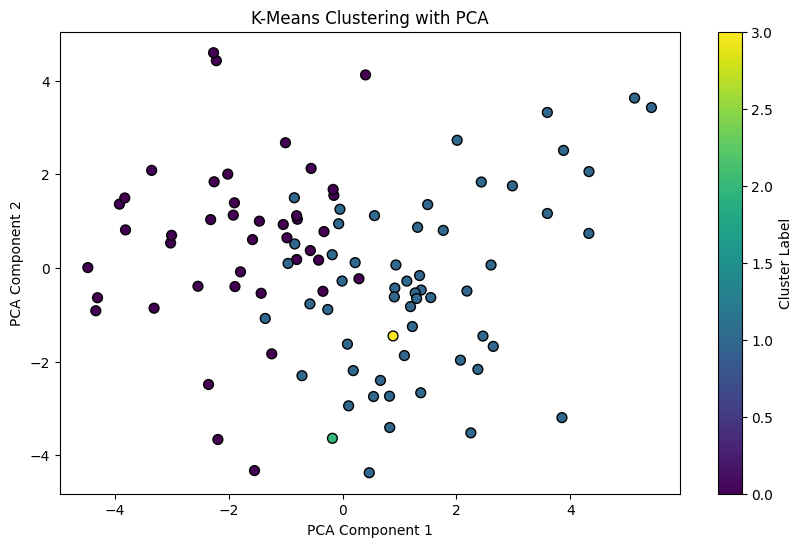

In [ ]:
# Applying K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # n_clusters can be adjusted
clusters = kmeans.fit_predict(scaled_data)

# Adding the cluster labels to the dataset
df['Cluster'] = clusters

# Evaluate with Silhouette Score
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f'Silhouette Score: {silhouette_avg:.3f}')

# Visual Inspection with PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('K-Means Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

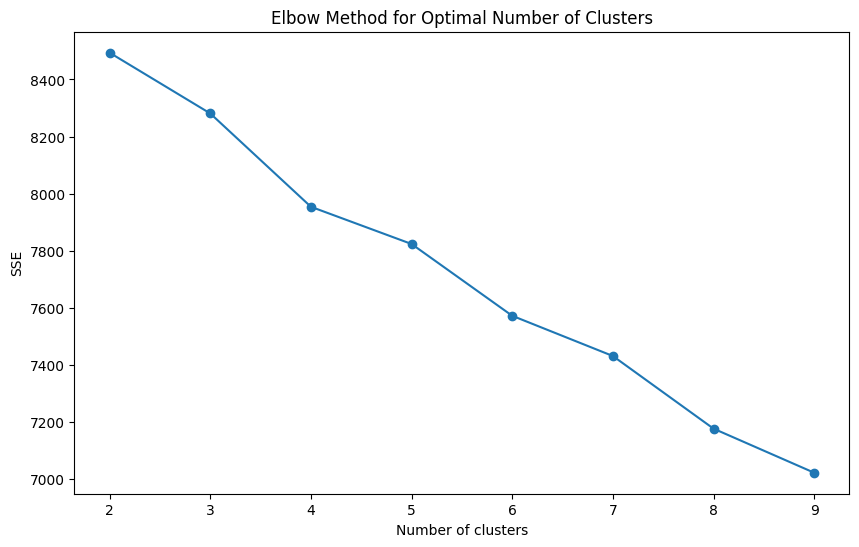

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Optimal Silhouette Score: 0.033


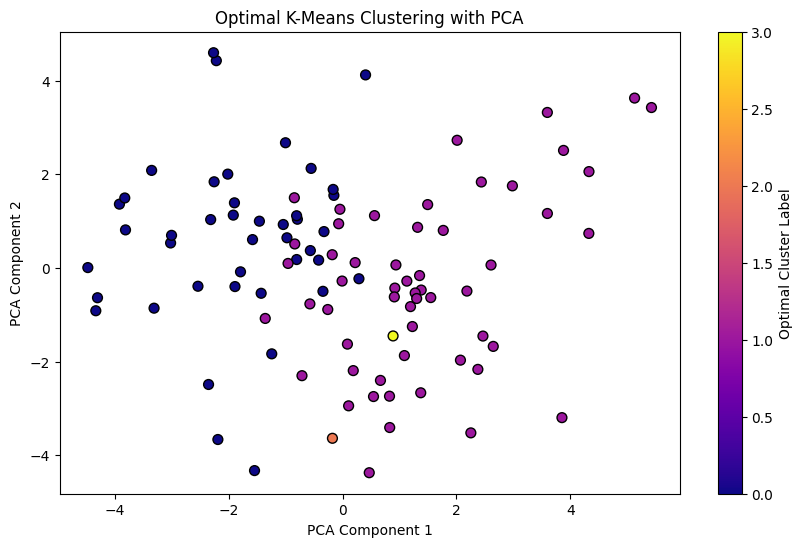

In [ ]:
# Tuning the number of clusters using the Elbow Method

sse = []  # Sum of squared distances to the closest cluster center
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# Assuming the optimal number of clusters from the Elbow curve is 4
optimal_k = 4
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
clusters_optimal = kmeans_optimal.fit_predict(scaled_data)

# Adding the new cluster labels to the dataset
df['Optimal_Cluster'] = clusters_optimal

# Evaluating the optimal K-Means model with Silhouette Score
silhouette_avg_optimal = silhouette_score(scaled_data, clusters_optimal)
print(f'Optimal Silhouette Score: {silhouette_avg_optimal:.3f}')

# Visual Inspection of the optimal model with PCA
pca_optimal_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
plt.scatter(pca_optimal_data[:, 0], pca_optimal_data[:, 1], c=clusters_optimal, cmap='plasma', marker='o', edgecolor='k', s=50)
plt.title('Optimal K-Means Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Optimal Cluster Label')
plt.show()

